# Week 5 - Incremental capstone project

In [43]:
# !pip install pandas
# !pip install seaborn
# !pip install numpy

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Load dataset
df = pd.read_csv('../../Datasets/FloridaBikeRentals.csv', encoding='iso-8859-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## check for missing data or null values

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [47]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [48]:
df['Date'] = df['Date'].apply(lambda d: pd.to_datetime(d, dayfirst=True))

In [49]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [50]:
# Convert months to int values
df['Month'] = df['Date'].dt.month
df['Month'].value_counts()

Month
12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: count, dtype: int64

In [51]:
# Convert months to int values
df['Day_of_week'] = df['Date'].dt.day_name()
df['Day_of_week'].value_counts()

Day_of_week
Friday       1272
Saturday     1248
Sunday       1248
Monday       1248
Tuesday      1248
Wednesday    1248
Thursday     1248
Name: count, dtype: int64

In [52]:
# Recognize if it was weekend or weekday
df['is_weekend'] = df['Day_of_week'].apply(lambda x: 1 if x[0]=='S' else 0 )
df['is_weekend'].value_counts()

is_weekend
0    6264
1    2496
Name: count, dtype: int64

<Axes: >

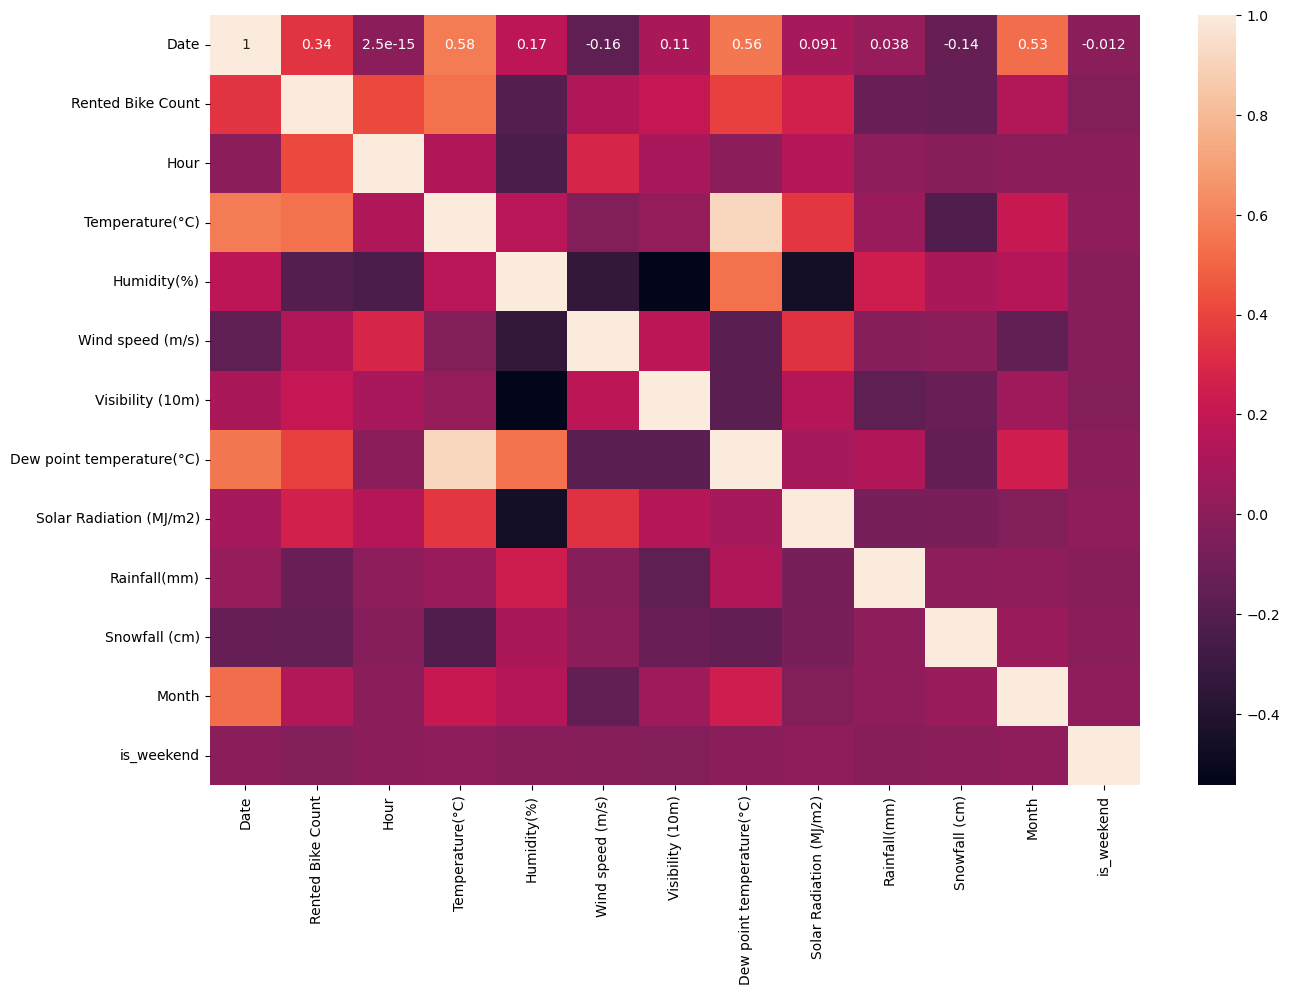

In [53]:
# Check correlations using heatmap

# Select columns that are numeric (exclude categorical)
numeric_df = df.select_dtypes(exclude='object')
numeric_df.head()

plt.figure(figsize=(15, 10))
# sns.heatmap(df.corr(), annot=True)
sns.heatmap(numeric_df.corr(), annot=True)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1500x1000 with 0 Axes>

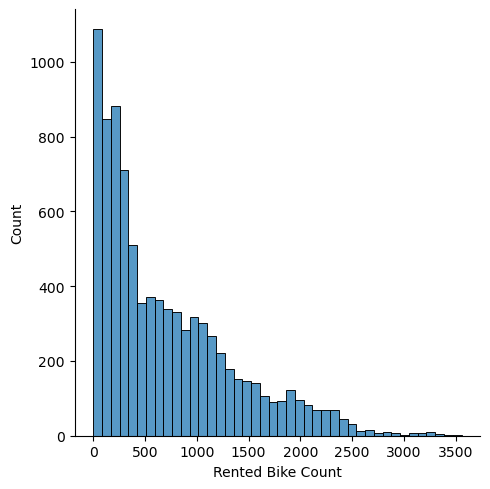

In [54]:
plt.figure(figsize=(15, 10))
# sns.displot(df, x='Rented Bike Count')
sns.displot(df['Rented Bike Count'])

## Plot Histogram

In [55]:
df.describe()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,is_weekend
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,2018-05-31 23:59:59.999999744,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.284932
min,2017-12-01 00:00:00,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2018-03-02 00:00:00,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,2018-06-01 00:00:00,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,2018-08-31 00:00:00,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,2018-11-30 00:00:00,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.451408


In [56]:
numeric_df.drop(columns='Date', inplace=True)
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Month                      8760 non-null   int32  
 11  is_weekend                 8760 non-null   int64  
dtypes: float64(6), int32(1), int64(5)
memory usage: 787.2 KB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


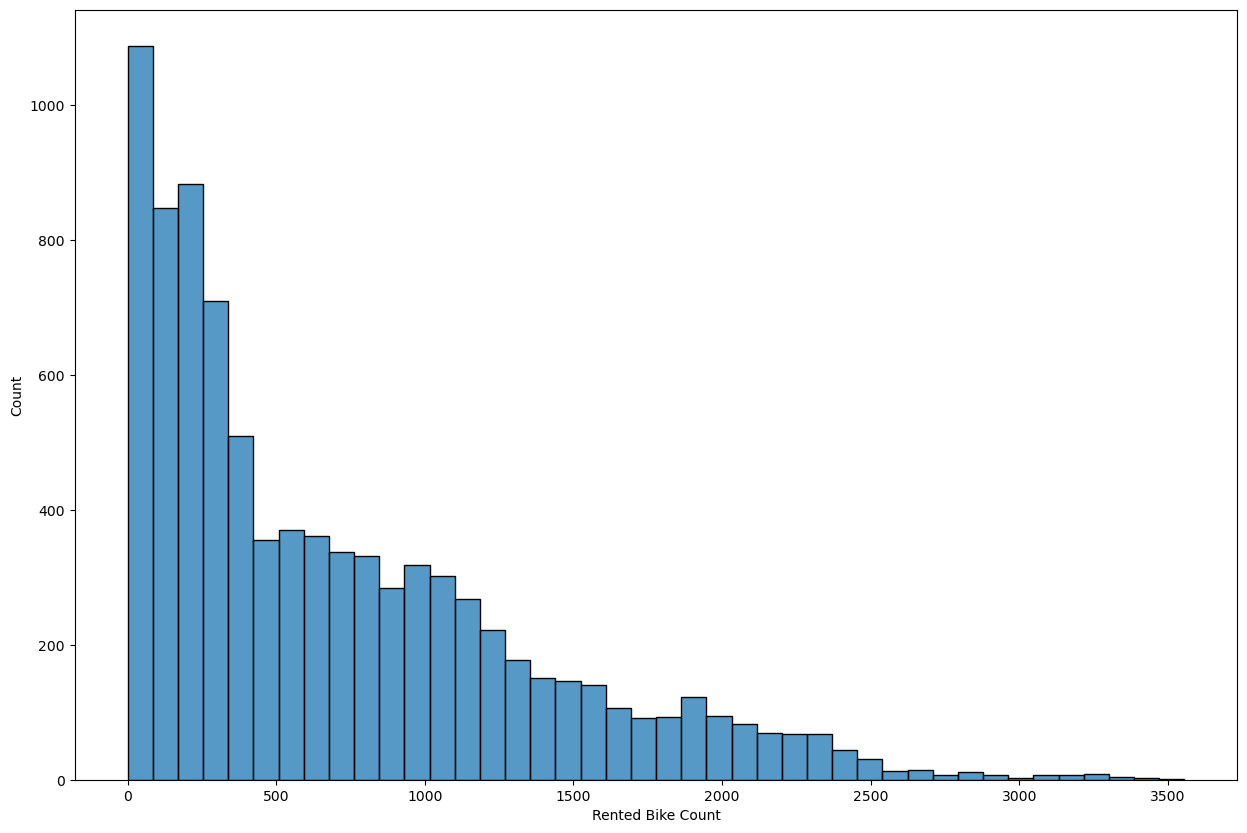

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


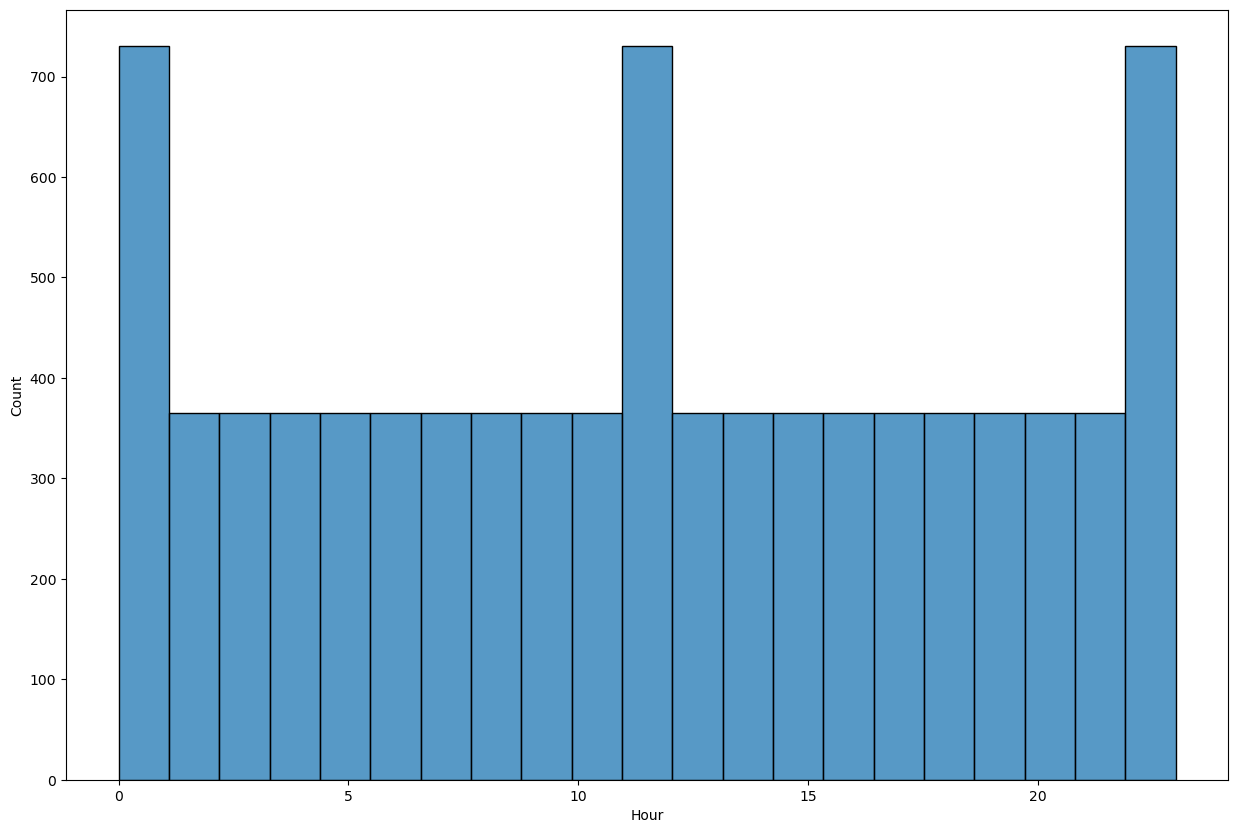

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


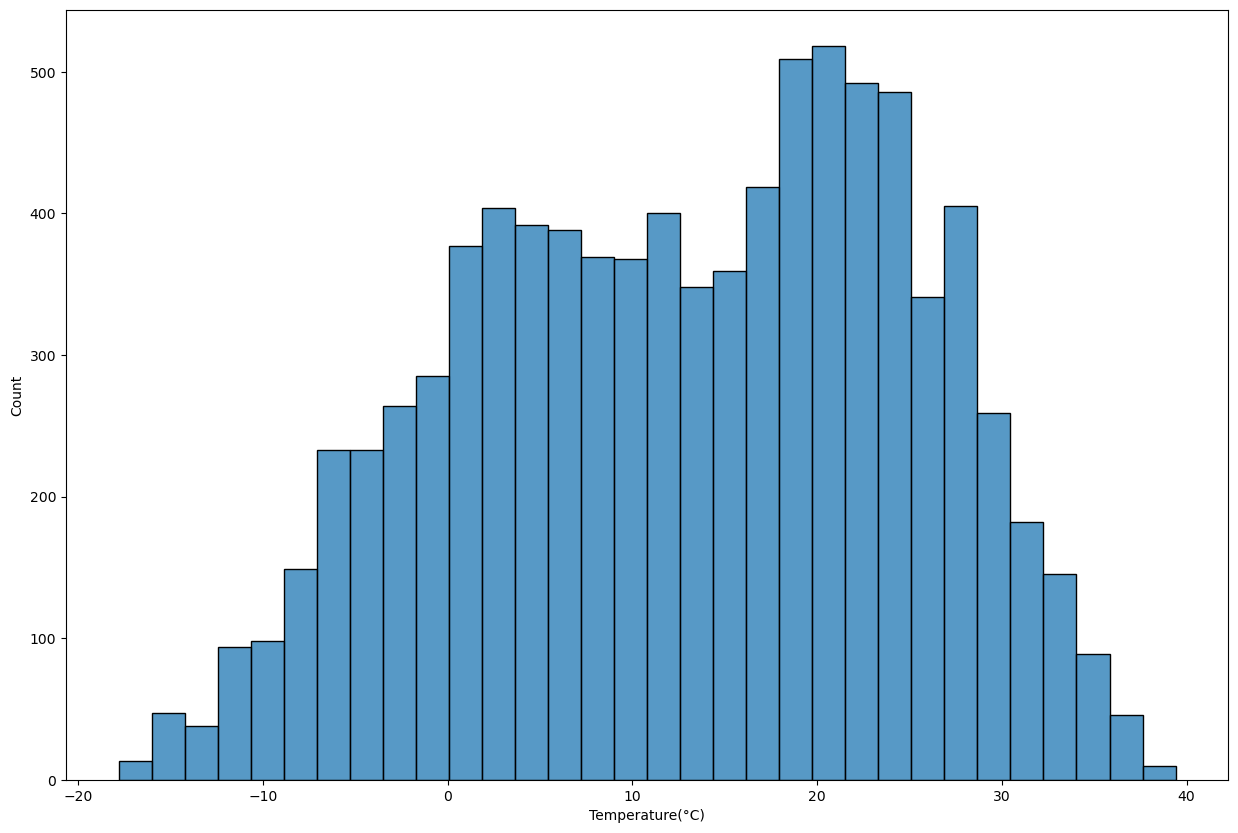

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


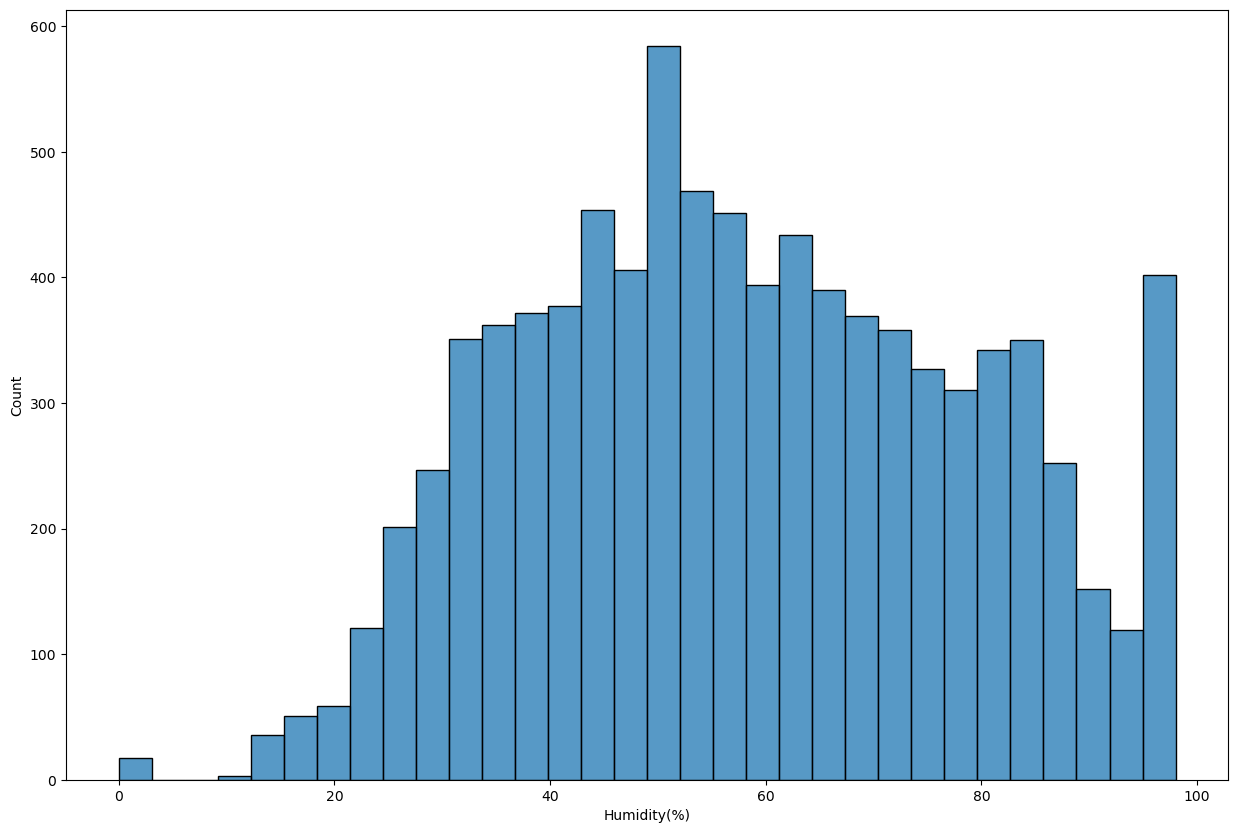

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


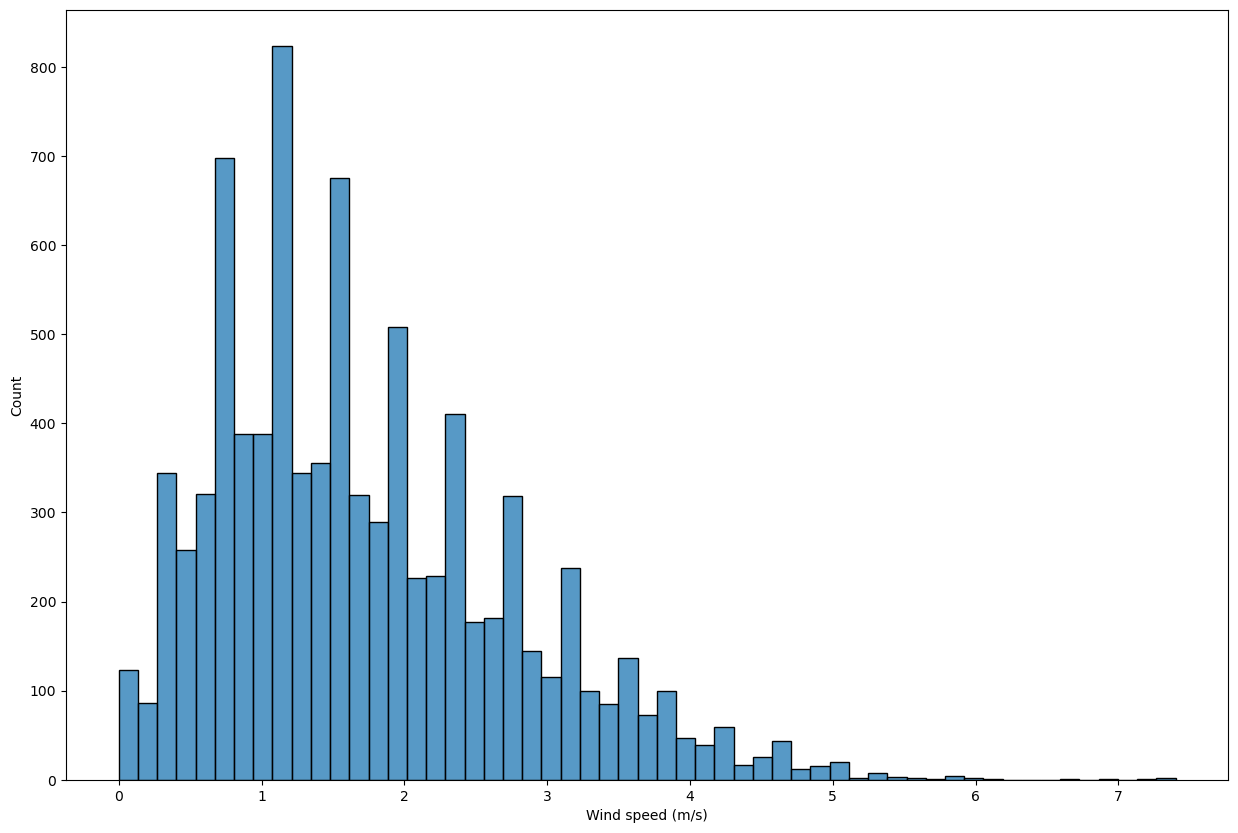

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


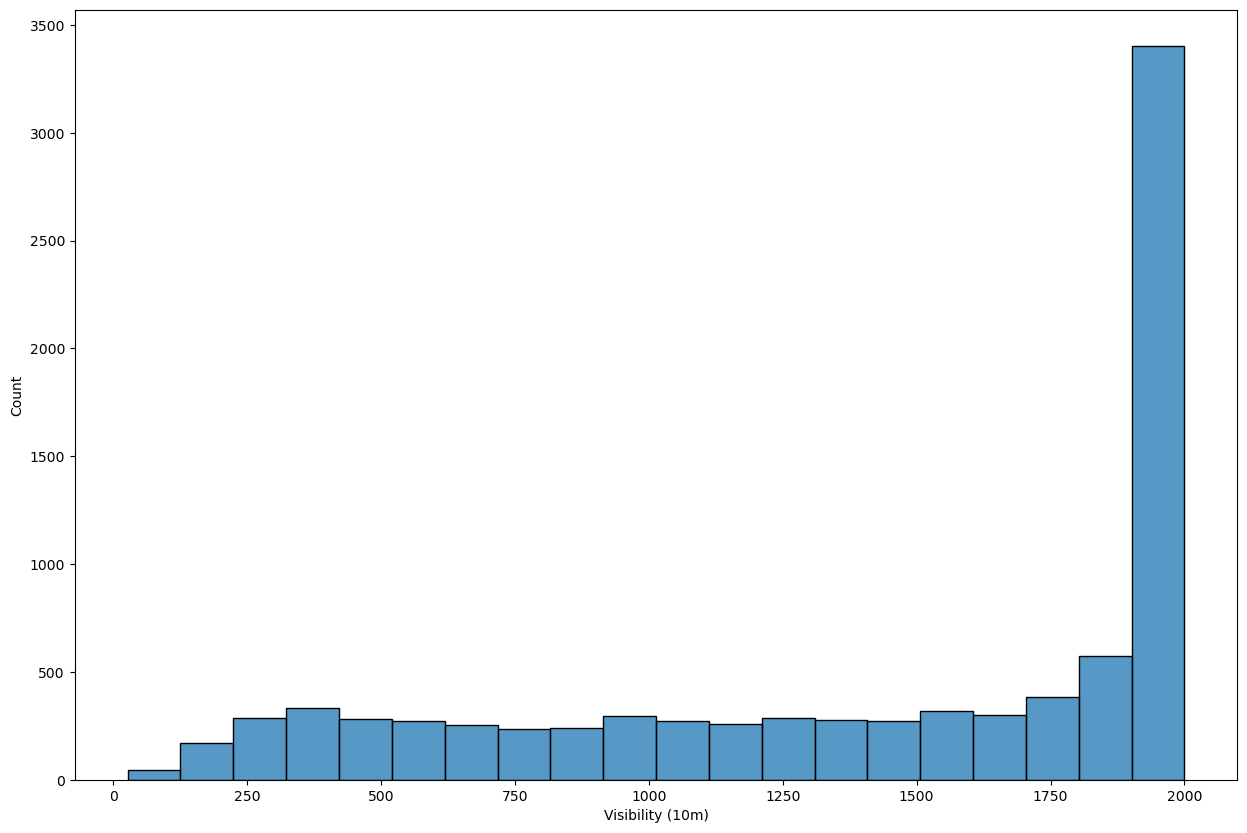

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


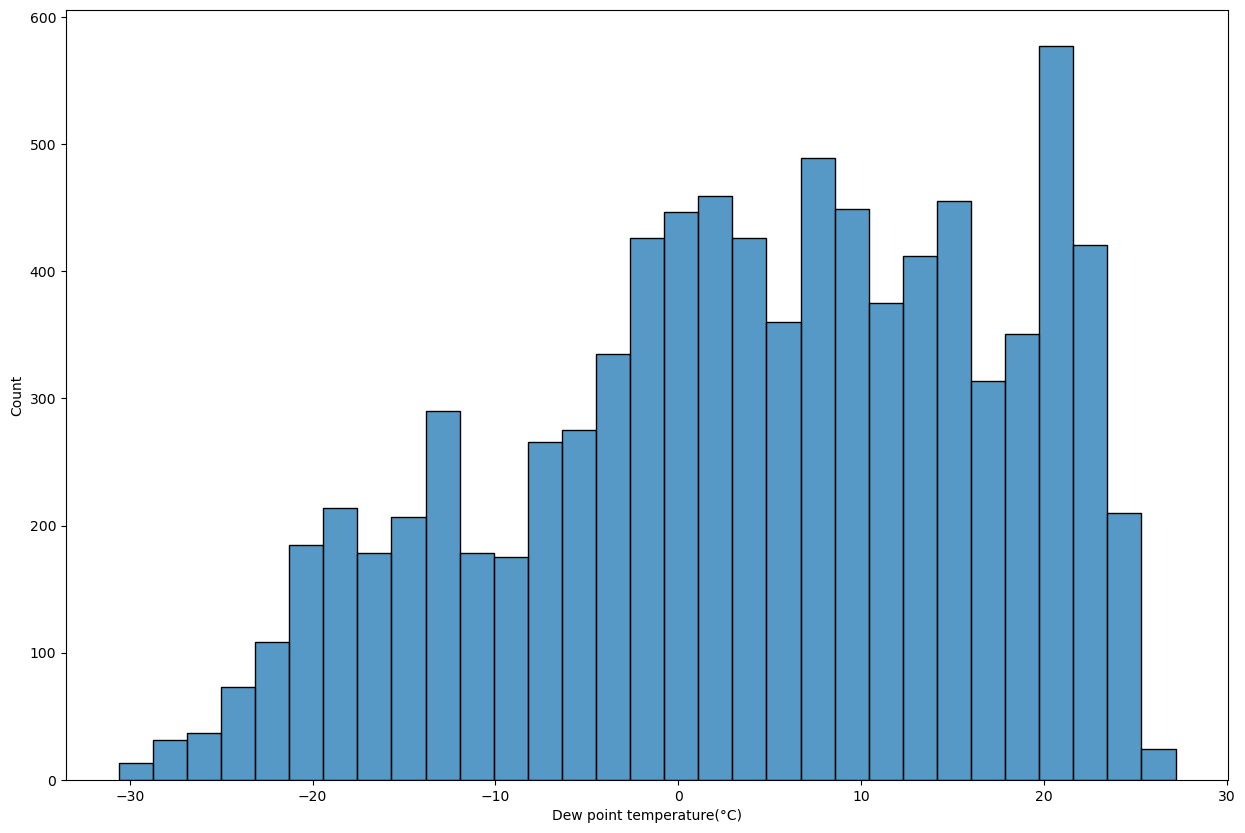

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


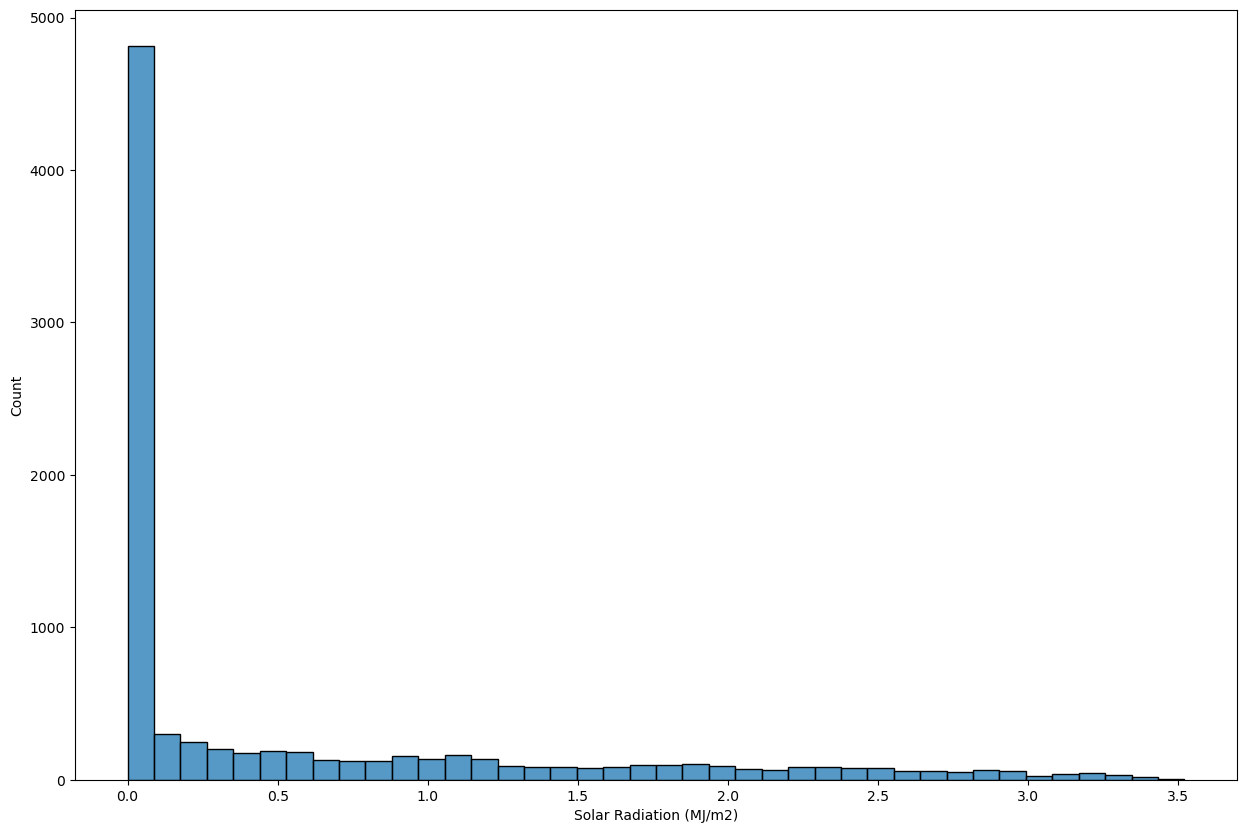

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


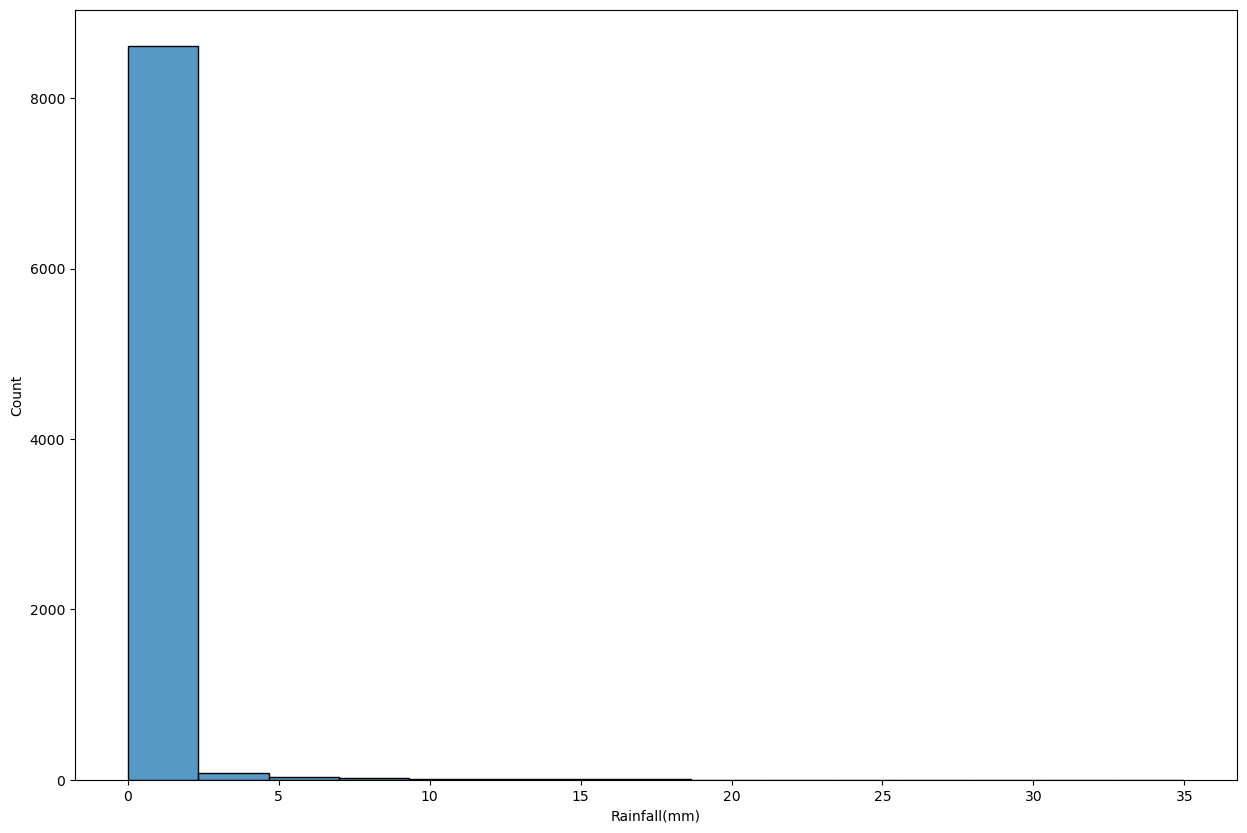

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


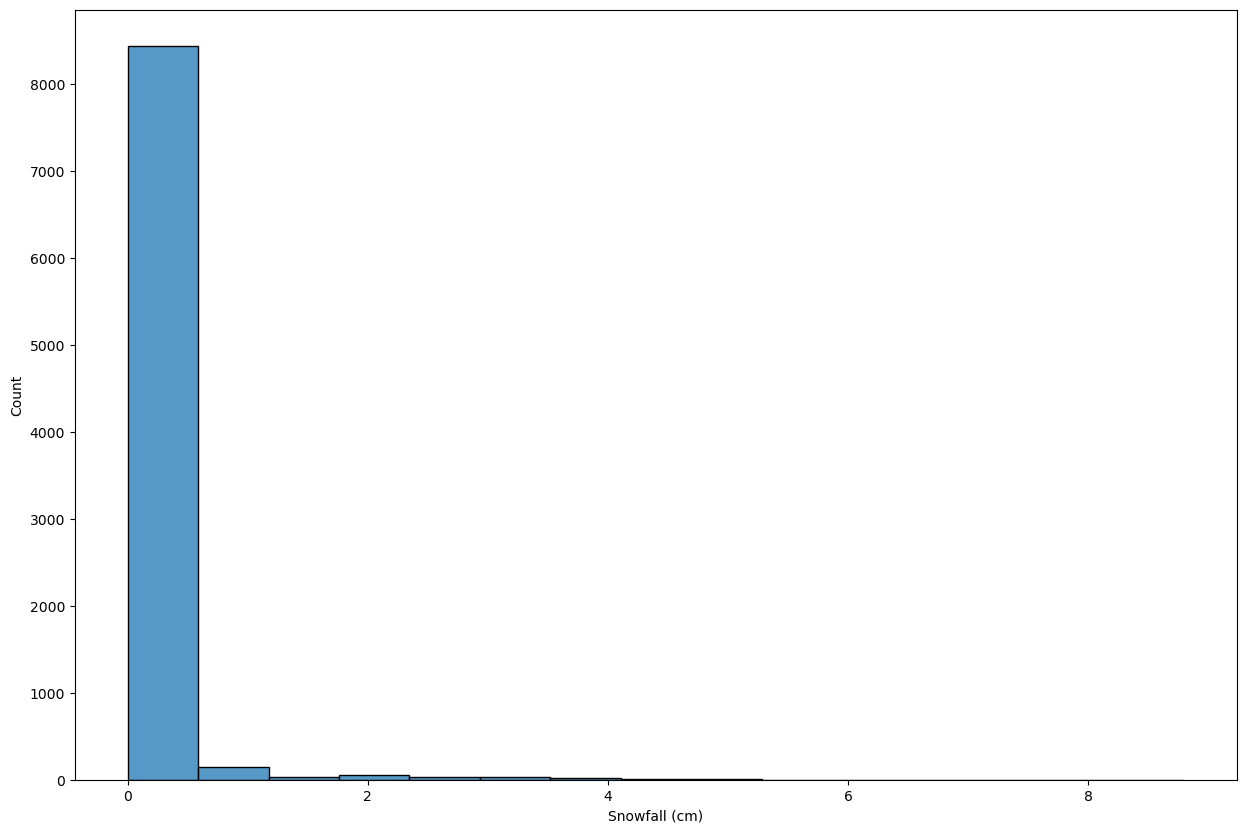

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


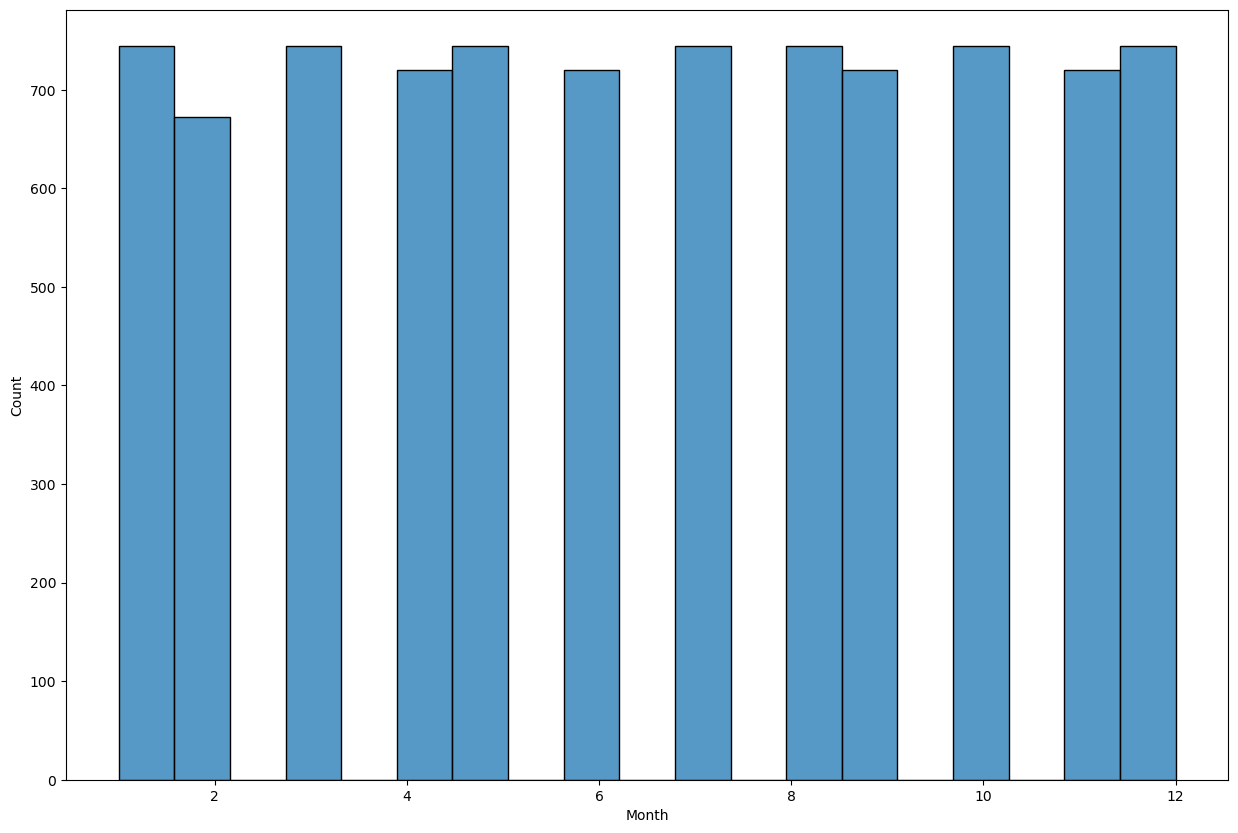

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


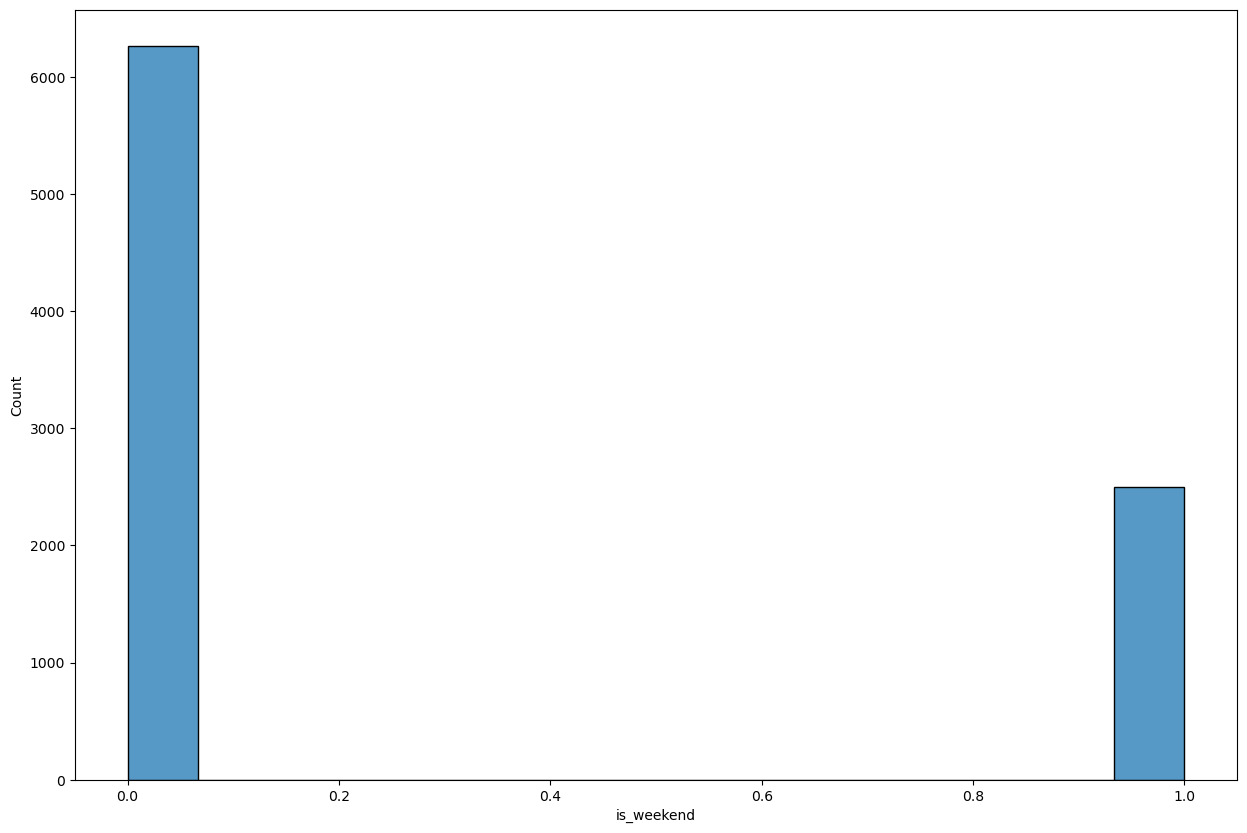

In [57]:

for column in numeric_df.columns:
    plt.figure(figsize=(15, 10))
    sns.histplot(df[column])    
    plt.show()

## Boxplots of categorical features

In [58]:
categorical_df = df.select_dtypes(include='object')
categorical_df.head()

,Seasons,Holiday,Functioning Day,Day_of_week
0,Winter,No Holiday,Yes,Friday
1,Winter,No Holiday,Yes,Friday
2,Winter,No Holiday,Yes,Friday
3,Winter,No Holiday,Yes,Friday
4,Winter,No Holiday,Yes,Friday


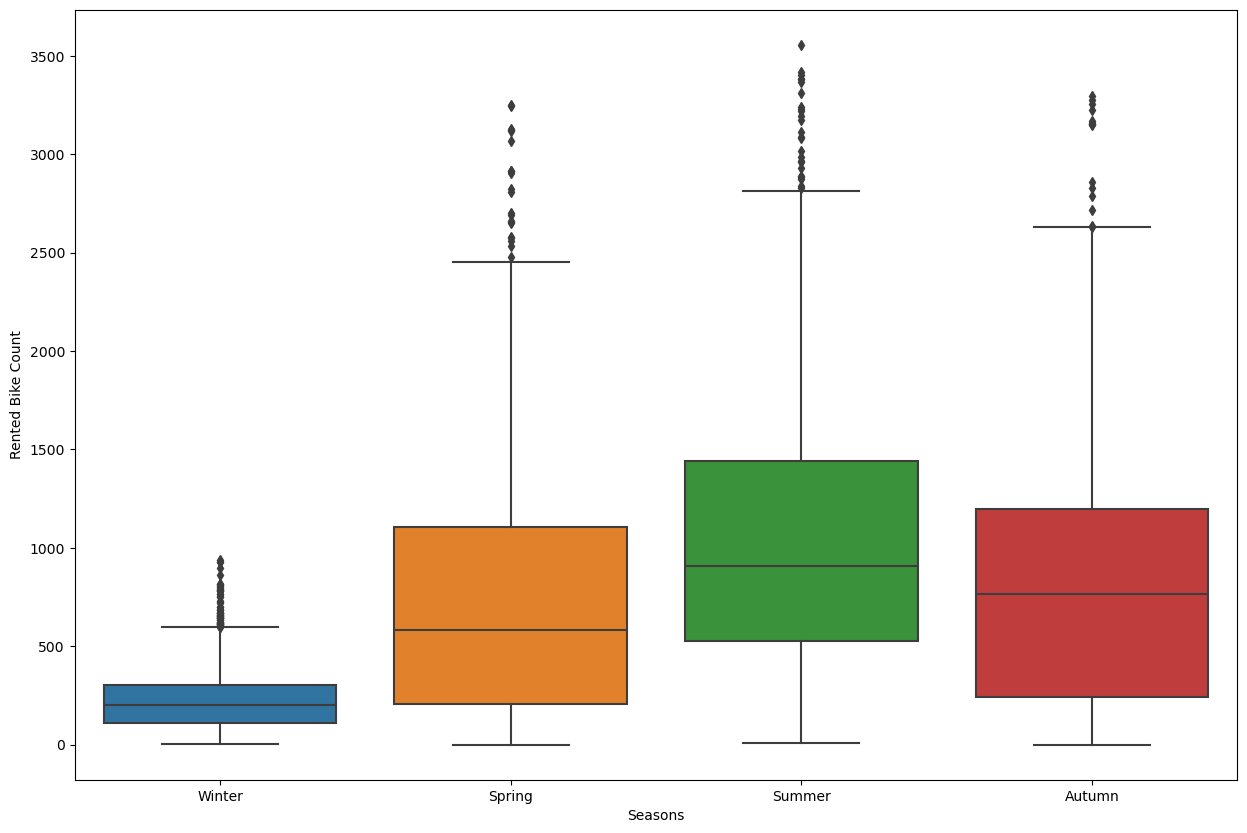

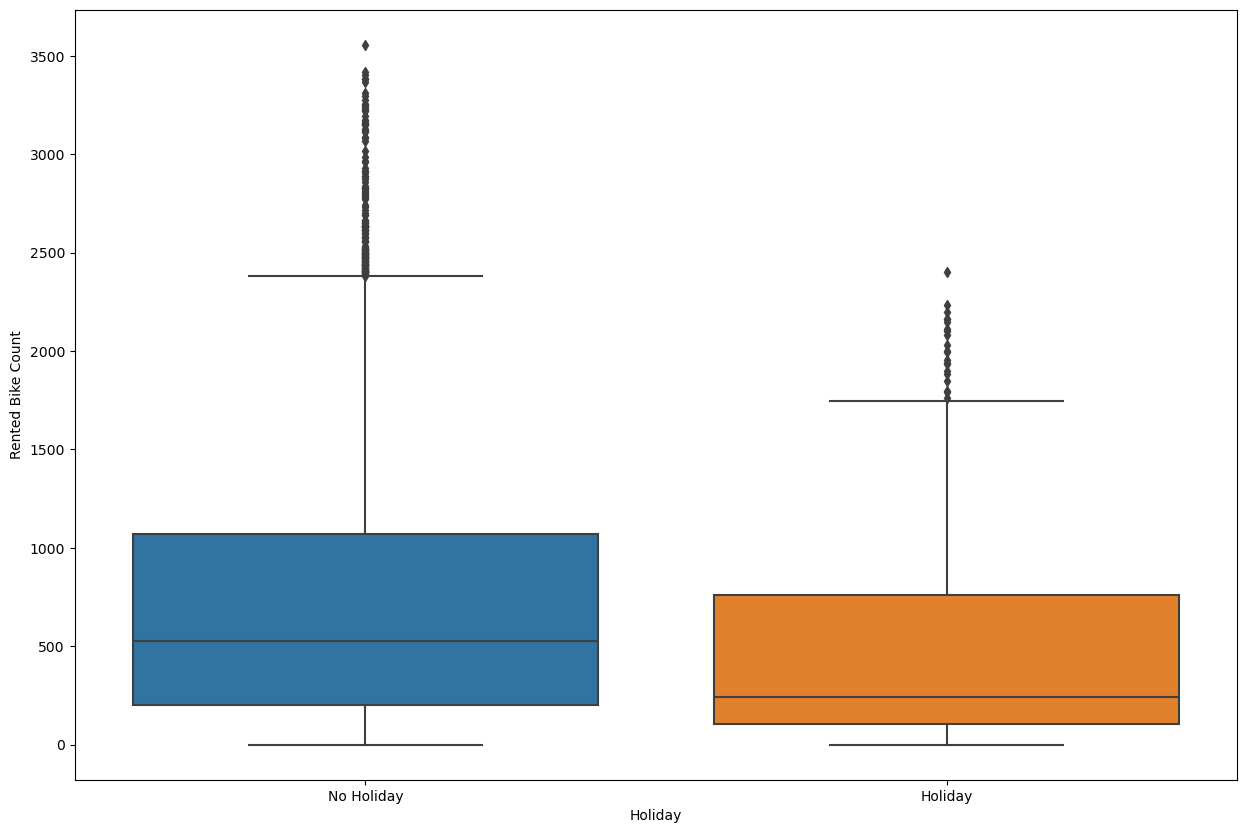

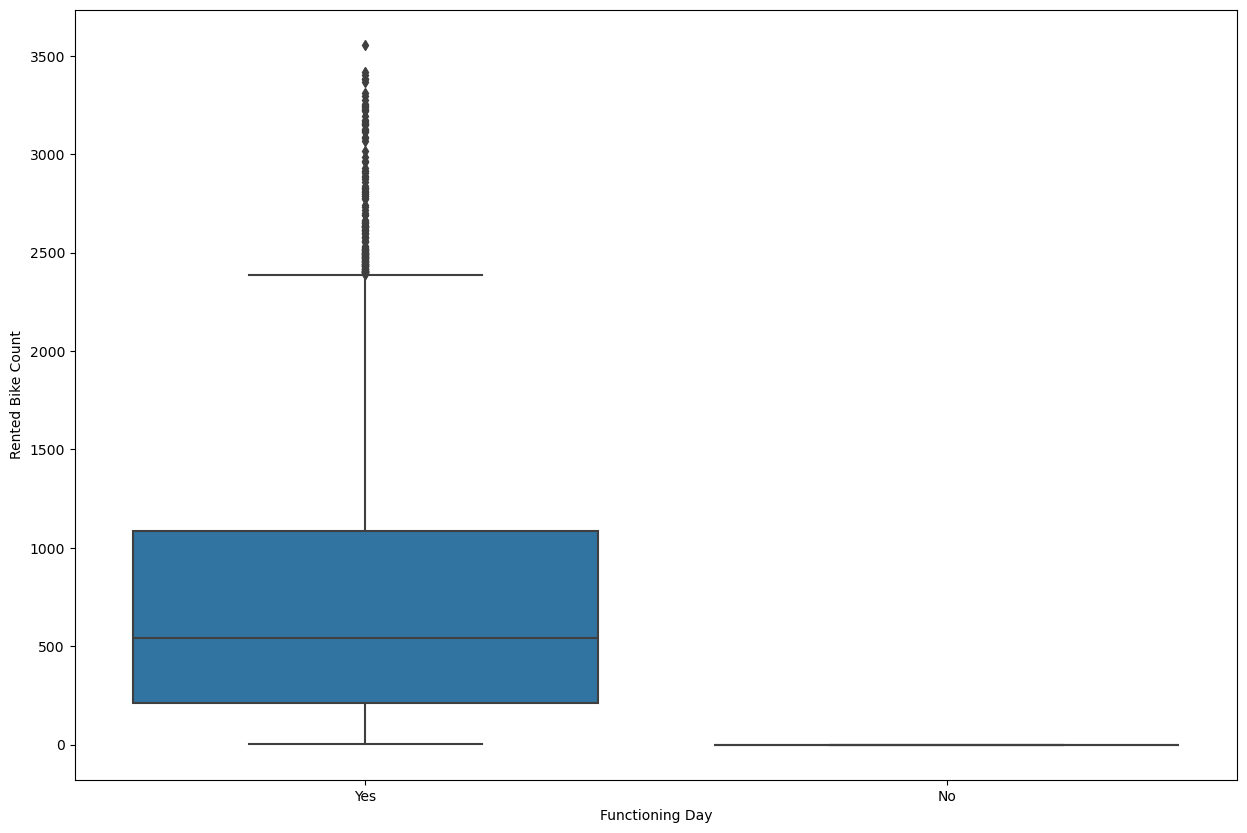

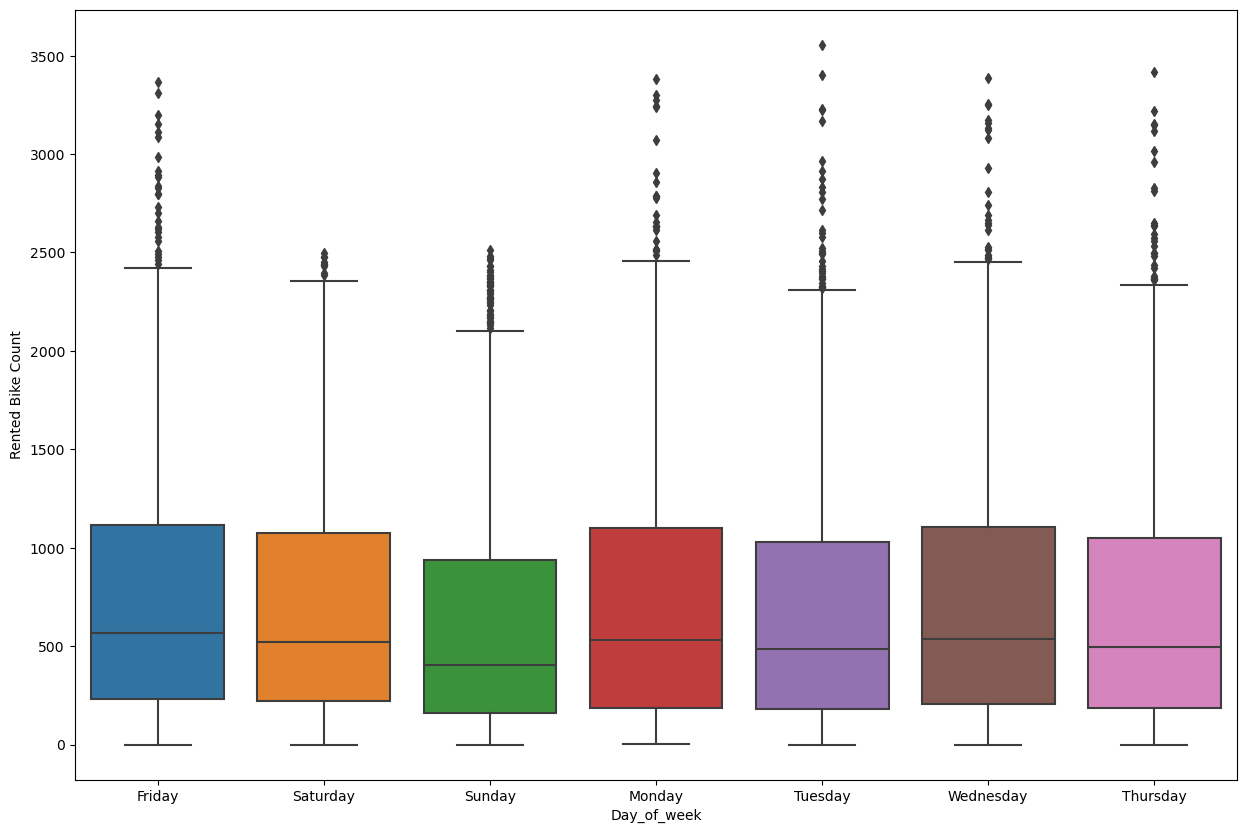

In [59]:
for column in categorical_df.columns:
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df, x=column, y=df['Rented Bike Count'])    
    plt.show()

In [60]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day_of_week', 'is_weekend'],
      dtype='object')

In [61]:
features = ['Hour', 'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'is_weekend'],

for feature in features:
    plt.figure(figsize=(15, 10))
    sns.catplot(data=df, x=df[feature], y=df['Rented Bike Count'])   
    plt.show()

ValueError: 2

<Figure size 1500x1000 with 0 Axes>

### Convert categorical into numerical variables

In [ ]:
# One-Hot Encoding
# Dummy encoding, dropping first for a more condensed representation
dummy_categories = pd.get_dummies(categorical_df, drop_first=True)
dummy_categories.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday
0,False,False,True,True,True,False,False,False,False,False,False
1,False,False,True,True,True,False,False,False,False,False,False
2,False,False,True,True,True,False,False,False,False,False,False
3,False,False,True,True,True,False,False,False,False,False,False
4,False,False,True,True,True,False,False,False,False,False,False


In [ ]:
final_df = pd.concat([dummy_categories,numeric_df], axis=1)
final_df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,...,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,is_weekend
0,False,False,True,True,True,False,False,False,False,False,...,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,0
1,False,False,True,True,True,False,False,False,False,False,...,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,0
2,False,False,True,True,True,False,False,False,False,False,...,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,0
3,False,False,True,True,True,False,False,False,False,False,...,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,0
4,False,False,True,True,True,False,False,False,False,False,...,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,0


### Split Data

In [ ]:
# Remove the feature we want to predict
X = final_df.drop(['Rented Bike Count'], axis=1)
X.columns

Index(['Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Day_of_week_Monday',
       'Day_of_week_Saturday', 'Day_of_week_Sunday', 'Day_of_week_Thursday',
       'Day_of_week_Tuesday', 'Day_of_week_Wednesday', 'Hour',
       'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month',
       'is_weekend'],
      dtype='object')

In [ ]:
y = final_df['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

### Standard Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train) # Do this in the train only, not in the test

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train our models

Create the model to predict the bike count per hour

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

## Train Linear Regression model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
linear_model_predictions = linear_model.predict(X_test)
linear_model_predictions

array([652.82924894, 972.07924894, 801.95424894, ..., 627.95424894,
       906.95424894, 498.95424894])

In [ ]:
y_test

4136     694
6705    1186
3538     789
6583     511
1993     190
        ... 
2263      85
6255    1196
7617     775
4306     893
7777     622
Name: Rented Bike Count, Length: 1752, dtype: int64

Calculate Metrics:

In [ ]:
lin_r2_score = r2_score(y_test, linear_model_predictions)
lin_mse = mean_squared_error(y_test, linear_model_predictions)
lin_mae = mean_absolute_error(y_test, linear_model_predictions)

In [ ]:
print('r2 score: ',lin_r2_score)
print('MSE score: ',lin_mse)
print('MAE score: ',lin_mae)
print('RMSE score: ',np.sqrt(lin_mse))

r2 score:  0.5505476006310165
MSE score:  185754.44357779104
MAE score:  320.63061085456997
RMSE score:  430.9923938746379


Looking at RMSE, is basically saying tht our model is off by 430 bikes per hour. So is not a great predictor, we want to have a number as small as possible.

## LASSO Regression

In [66]:
lasso_model = Lasso(alpha=0.5) 
#We want to use GridSearch to find alpha hyperparameter automatically
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.5)

In [67]:
lasso_model_preds = lasso_model.predict(X_test)

In [69]:
lasso_r2_score = r2_score(y_test, lasso_model_preds)
lasso_mse = mean_squared_error(y_test, lasso_model_preds)
lasso_mae = mean_absolute_error(y_test, lasso_model_preds)

print('r2 score: ',lasso_r2_score)
print('MSE score: ',lasso_mse)
print('MAE score: ',lasso_mae)
print('RMSE score: ',np.sqrt(lasso_mse))

r2 score:  0.5505471764649721
MSE score:  185754.61888162227
MAE score:  320.5826196662313
RMSE score:  430.99259724689273


Model is not so good. Very similar to the linear model results

## RIDGE Regression

In [74]:
ridge_model = Ridge(alpha=5) 
#We want to use GridSearch to find alpha hyperparameter automatically
ridge_model.fit(X_train, y_train)

Ridge(alpha=5)

In [75]:
ridge_model_preds = ridge_model.predict(X_test)

In [76]:
ridge_r2_score = r2_score(y_test, ridge_model_preds)
ridge_mse = mean_squared_error(y_test, ridge_model_preds)
ridge_mae = mean_absolute_error(y_test, ridge_model_preds)

print('r2 score: ',ridge_r2_score)
print('MSE score: ',ridge_mse)
print('MAE score: ',ridge_mae)
print('RMSE score: ',np.sqrt(ridge_mse))

r2 score:  0.5504004028929452
MSE score:  185815.27901658218
MAE score:  320.6311828283662
RMSE score:  431.06296409756914


In [77]:
lasso_model.coef_

array([ -46.05981478,  -60.02671997, -151.52228336,   28.19730854,
        166.55884938,  -16.76481188,   -0.        ,  -24.43482522,
        -12.22773048,   -1.82715757,    3.0922784 ,  189.99846859,
        181.24058116, -232.1841565 ,   13.2347287 ,    0.30516365,
        155.31784074,  -67.18878635,  -65.04139341,   12.79646842,
         15.74028801,  -23.46578024])

lasso model is dropping some coefficients, meaning some features are not that relevant

### Ways to improve the performance of this models

1. Do automatic hyperparameter tunning like GridSearch or RandomSearch.
2. Do data cleaning or feature engineering.
3. Use a non-linear (polynomial) regression model.

Ways to detect the most importan features:
1. Create a new dataset including only features that provide the highest coefficients
2. Use only highest correlation coefficients (close to 1) features.